In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# - 한셀안의 인쇄동작을 모두 수행
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# - matplotlib 초기 설정(한글 폰트 설정)
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
mpl.rc('font',size=16) # 전체 폰트크기 지정

# << 수원시 인구 조사 데이터 >>
## [0] suwon_census.csv 파일 확인하기
- 2022년도 1월의 수원시 인구조사 데이터셋 df_census이다. 

In [2]:
df_census = pd.read_csv('suwon_census.csv')
df_census.head()

,도,시,구,동,0세,1세,2세,3세,4세,5세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,경기도,수원시,장안구,파장동,64,83,97,107,107,146,...,22,28,16,10,3,4,4,3,6,2
1,경기도,수원시,장안구,율천동,215,214,238,238,238,277,...,25,28,12,18,10,7,5,3,4,5
2,경기도,수원시,장안구,정자1동,95,141,159,168,219,239,...,22,24,20,17,5,4,3,5,1,4
3,경기도,수원시,장안구,정자2동,181,222,239,267,303,348,...,19,30,14,17,11,5,5,5,6,6
4,경기도,수원시,장안구,정자3동,134,168,206,234,253,312,...,26,21,14,11,7,1,3,4,0,2


## [1] 10대와 20대 집단의 인구 재 집계
### df_census로 다음 조건을 순서대로 처리하여 df변수에 대입한다
1. df_census에서 '구'와 '동'컬럼을 가져와 새로운 DF을 생성하여 df 변수에 대입하라
1. 10대(10세 ~ 19세) 인구 합계를 구한 Series를 '10대' 컬럼으로 df에 추가하라
2. 20대(20세 ~ 29세) 인구 합계를 구한 Series를 '20대' 컬럼으로 df에 추가하라
- 다음 그림 참고(일부)
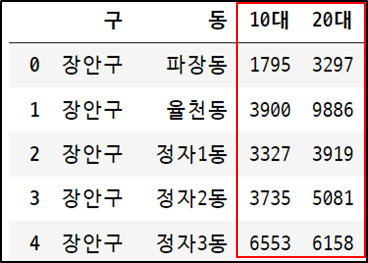

In [5]:
# [1] 코드 작성
df = df_census.loc[:,['구','동']]
df['10대'] = df_census.loc[:,'10세':'19세'].sum(axis=1)
df['20대'] = df_census.loc[:,'20세':'29세'].sum(axis=1)
df.head()

,구,동,10대,20대
0,장안구,파장동,1795,3297
1,장안구,율천동,3900,9886
2,장안구,정자1동,3327,3919
3,장안구,정자2동,3735,5081
4,장안구,정자3동,6553,6158


## [2] 연산 및 집계
### [1]번에서 완성한 df으로 다음 1~3번 문제들을 처리하라
### 2-1. 10대와 20대 2집단의 인구 분포도를 describe()로 요약 통계하여 인쇄한다
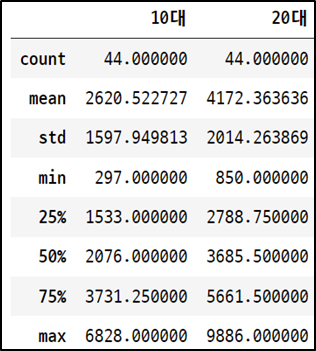

In [6]:
# [2-1] 코드 작성
df.describe()

,10대,20대
count,44.000000,44.000000
mean,2620.522727,4172.363636
std,1597.949813,2014.263869
min,297.000000,850.000000
25%,1533.000000,2788.750000
50%,2076.000000,3685.500000
75%,3731.250000,5661.500000
max,6828.000000,9886.000000


### 2-2. 10대와 20대 집단내 지역중 가장 많은 인구순으로 순위를 부여하라
- 예로 20대 집단내에서 율천동이 1위, 인계동이 2위 순이다
- 동컬럼을 index로 배치한 후 rank를 적용한다.
- min방식으로 설정하고 높은 인구수가 1위가 되어야 하며 수치컬럼에만 적용한다
- 다음 그림 참조(일부)
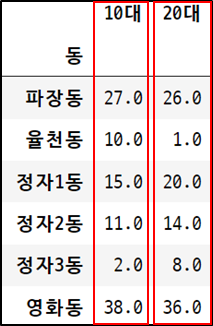

In [43]:
# [2-2] 코드 작성
df1 = df.set_index('동').rank(method='min', ascending=False, numeric_only=True)
df1.head(6)

,10대,20대
동,,
파장동,27.0,26.0
율천동,10.0,1.0
정자1동,15.0,20.0
정자2동,11.0,14.0
정자3동,2.0,8.0
영화동,38.0,36.0


### 2-3. 지역별 10대와 20대 인구를 합산하여 10,000 ~ 20,000명 사이의 분포를 보이는 지역의 개수를 구하라
- 결과값은 9로 9개 지역이 만명이상 분포를 보이고 있다
- between함수를 이용하며 결과값이 True나 False값을 갖는다. True의 개수를 얻기 위해 sum함수를 이용한다

In [44]:
# [2-3] 코드 작성
df.sum(axis=1, numeric_only=True).between(10000, 20000).sum()

9

## [3] 지역별 인구 편차 집계
### 주어진 ndf에서 인구가 가장 적은 지역 대비 다른 지역간 인구 편차를 구하라
1. df에서 장안구지역만 추출한 ndf가 주어진다. '동'컬럼이 행의 index로 배치되어 있다.
2. ndf를 이용하여 동별 인구합계가 가장 적은 지역(동)을 집계로 찾는다.
- 집계 결과로 인구가 가장 적은 지역으로 '연무동'이 얻어진다.
3. 연무동 지역 대비 다른 지역과의 편차 집계하여 인쇄하라
- 다음 그림을 참고
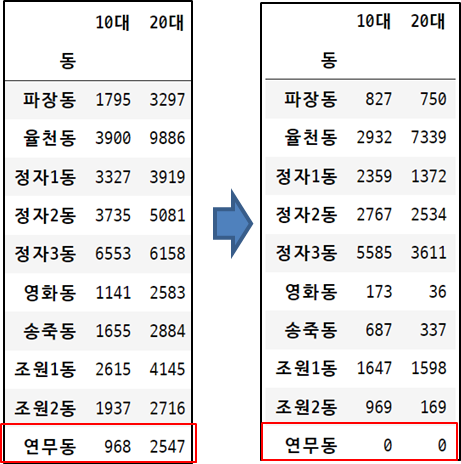

In [45]:
ndf = df.set_index(['구','동']).loc['장안구']

# [3] 코드 작성
result = ndf.sum(axis=1).idxmin()
ndf - ndf.loc[result]

,10대,20대
동,,
파장동,827,750
율천동,2932,7339
정자1동,2359,1372
정자2동,2767,2534
정자3동,5585,3611
영화동,173,36
송죽동,687,337
조원1동,1647,1598
조원2동,969,169


## [4] 빈도 집계로 분포도 파악하기
###  주어진 ndf로 다음 1~2번 문제를 해결하라
### 4-1. 지역별 가장 많은 인구수를 보이는 나이를 'best'컬럼으로 추가한다
- df_censes에서 20대 집단만 추출한 ndf이다
- 다음 그림을 참고(일부)
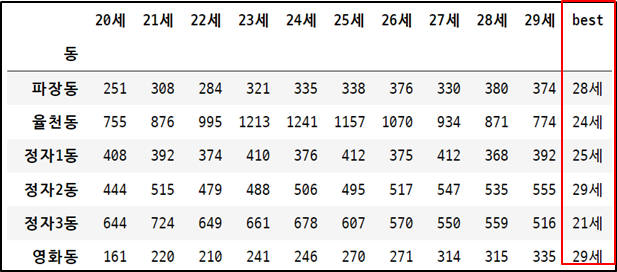

In [46]:
ndf = df_census.set_index('동').loc[:, '20세':'29세']
# [4-1] 코드 작성
ndf['best'] = ndf.idxmax(axis=1)
ndf.head(6)

,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,best
동,,,,,,,,,,,
파장동,251,308,284,321,335,338,376,330,380,374,28세
율천동,755,876,995,1213,1241,1157,1070,934,871,774,24세
정자1동,408,392,374,410,376,412,375,412,368,392,25세
정자2동,444,515,479,488,506,495,517,547,535,555,29세
정자3동,644,724,649,661,678,607,570,550,559,516,21세
영화동,161,220,210,241,246,270,271,314,315,335,29세


### 4-2. 'best'컬럼에서 연령대별 빈도를 구하여 sr변수에 대입하고 인쇄하라
- 다음 그림 참고
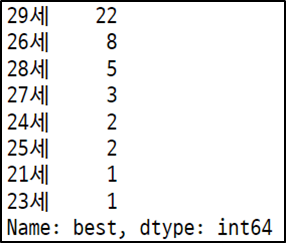

In [48]:
# [4-2] 코드 작성
sr = ndf['best'].value_counts()
sr

29세    22
26세     8
28세     5
27세     3
24세     2
25세     2
21세     1
23세     1
Name: best, dtype: int64

## [시각화 예시1] bar, barh 챠트
### 10대와 20대의 인구분포를 막대 차트로 시각화
* plot함수의 kind옵션
    - plot(kind=str) : 차트종류지정(차트 종류로 'line'(default), ‘bar’, ‘barh’, ‘hist’, ‘area’, 'pie’, ‘scatter’등)

<AxesSubplot: xlabel='동'>

<AxesSubplot: ylabel='동'>

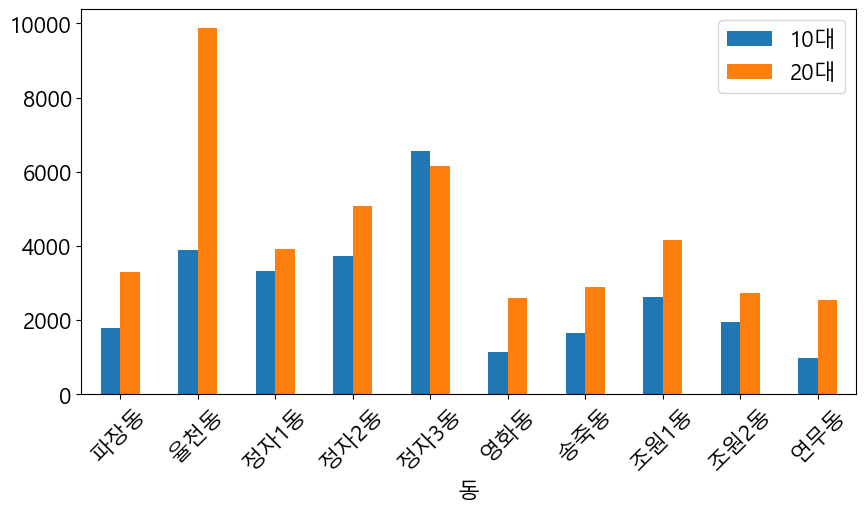

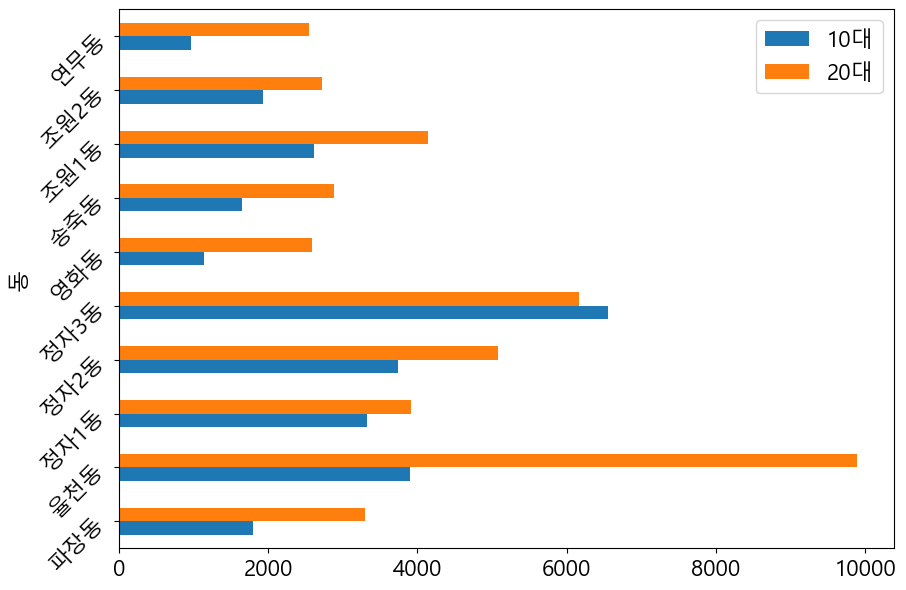

In [53]:
# [시각화 예시1] bar, barh 챠트
ndf = df.set_index(['구','동']).loc['장안구']

ndf.plot(kind='bar', figsize=(10,5), rot=45)
ndf.plot(kind='barh', figsize=(10,7), rot=45)

## [시각화 예시2] pie 챠트
### 장안구지역내 20대 인구분포를 인구율로 시각화하는 pie차트

동
율천동     9886
정자3동    6158
정자2동    5081
조원1동    4145
정자1동    3919
파장동     3297
송죽동     2884
조원2동    2716
영화동     2583
연무동     2547
Name: 20대, dtype: int64

<AxesSubplot: title={'center': '인구율'}, ylabel='20대'>

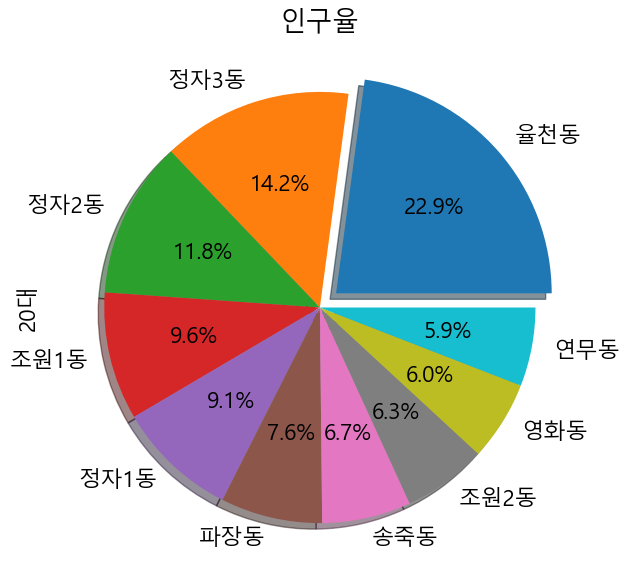

In [54]:
sr = df.set_index(['구','동']).loc['장안구','20대'].nlargest(10)
sr

# [시각화 예시2] pie차트
# autopct='%.1f%%'(백분율),  explode=[0.1,0.1,0,0,0,0,0,0](분리 간격)

exp = [0.1]*1 + [0]*9
sr.plot(kind='pie', autopct='%.1f%%', explode=exp, figsize=(7,7), \
        shadow=True, title='인구율')

## [시각화 예시3] box 챠트
### 장안구지역의 10대와 20대 인구 통계 요약하는 box 챠트
- box 챠트는 최소값, 제 1사분위 수 (Q1), 제 2사분위 수 또는 중위수 (Q2), 제 3사분위 수 (Q3), 최대값, 이상치(극단치)으로 요약 수치를 표현한다. 
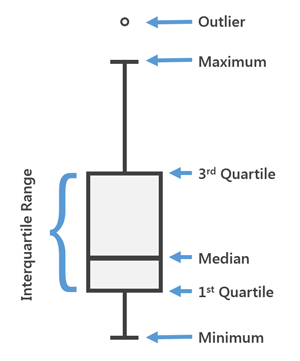

<AxesSubplot: >

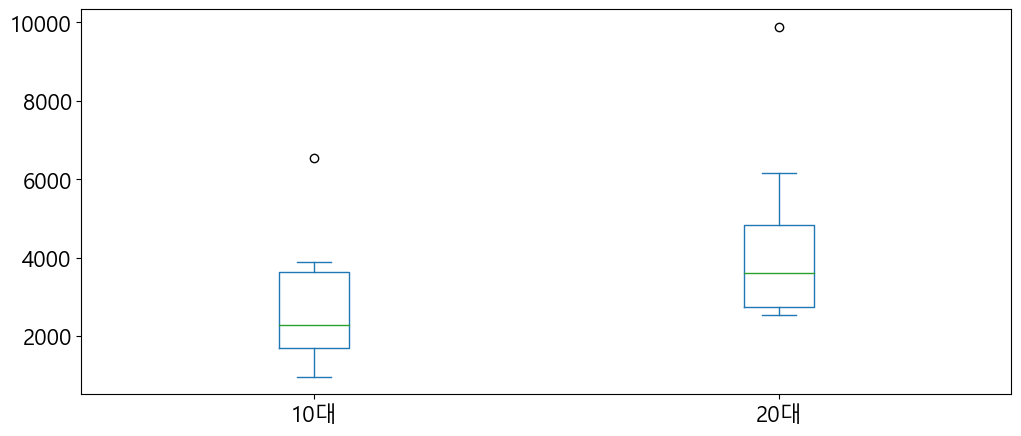

In [55]:
# [시각화 예시3] box 챠트
ndf = df.set_index(['구','동']).loc['장안구']
ndf.plot(kind='box', figsize=(12,5))

## [시각화 예시4]  scatter챠트
### 10대와 20대간 상관관계를 산점도 차트로 시각화
* 산점도(scatter)란 가로축과 세로축을 기준으로 2개의 데이터 간의 상관관계를 파악하는 그래프이다

<AxesSubplot: xlabel='10대', ylabel='20대'>

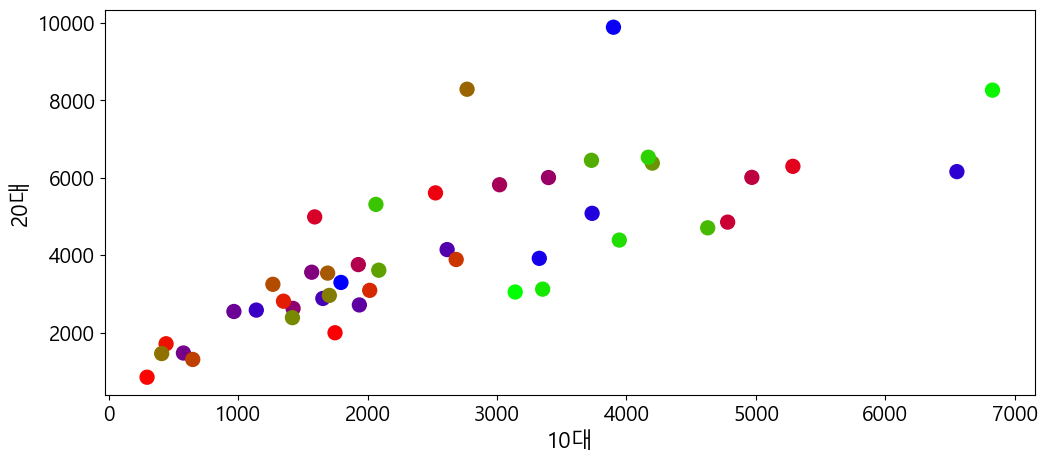

In [56]:
# [시각화 예시4] scatter 챠트
# s=점크기, c = 색상수(44개동), cmap=컬러맵(색상종류지정)

df.plot(kind='scatter', x='10대', y='20대', figsize=(12,5), fontsize=15, 
        c=range(44), cmap='brg', s=100)

## [시각화 예시5] subplot
### 화면을 분할하여 여려개 영역에 차트를 그리기

동
율천동     9886
정자3동    6158
정자2동    5081
조원1동    4145
정자1동    3919
파장동     3297
송죽동     2884
조원2동    2716
영화동     2583
연무동     2547
Name: 20대, dtype: int64

<AxesSubplot: title={'center': '1'}, xlabel='동'>

<AxesSubplot: title={'center': '2'}, ylabel='20대'>

<AxesSubplot: title={'center': '3'}, xlabel='동'>

<AxesSubplot: title={'center': '4'}, ylabel='동'>

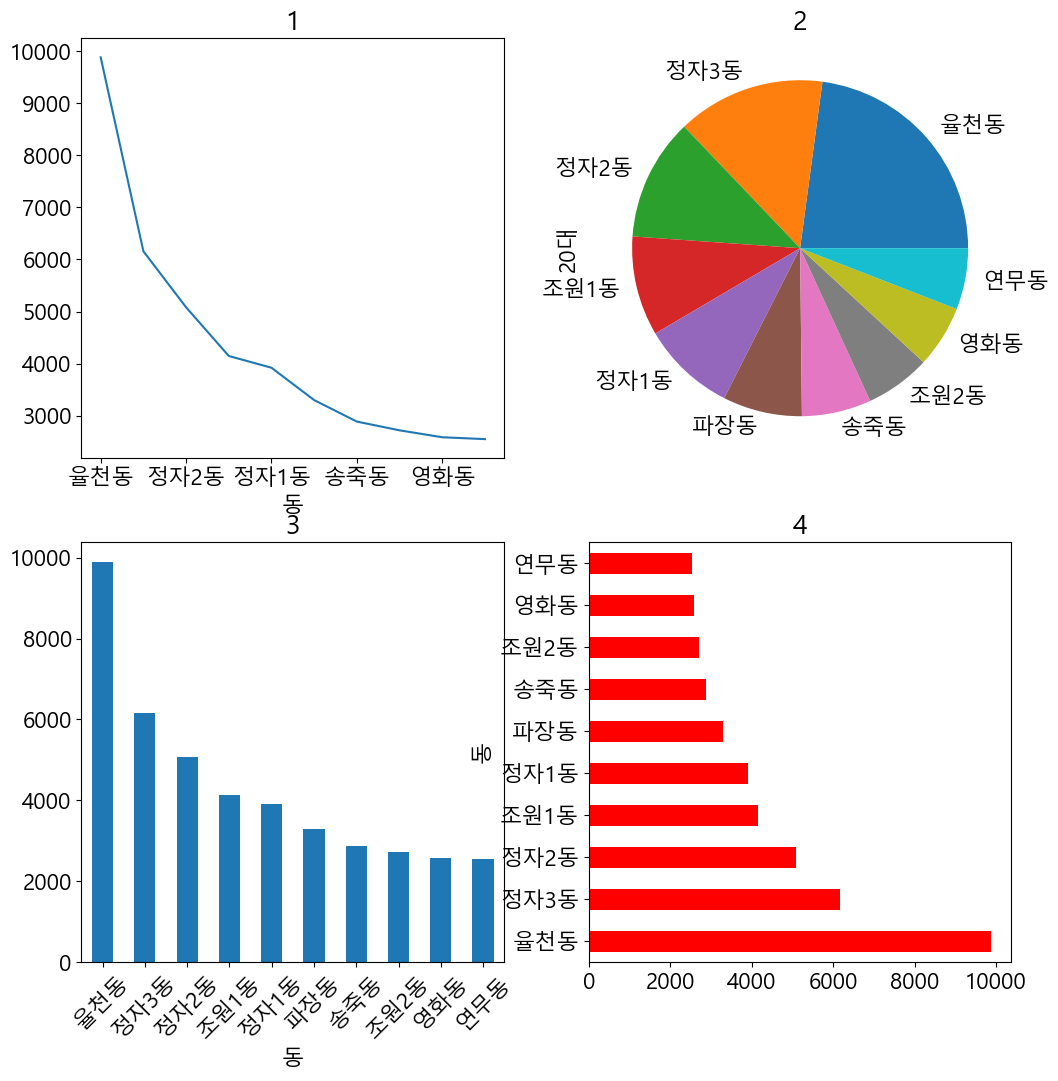

In [57]:
sr = df.set_index(['구','동']).loc['장안구','20대'].nlargest(10)
sr

# [시각화 예시5] subplot

fig, axes = plt.subplots(2,2)
sr.plot(kind='line', ax=axes[0,0], title='1', figsize=(12,12))
sr.plot(kind='pie', ax=axes[0,1], title='2')
sr.plot(kind='bar', ax=axes[1,0], title='3', rot=45)
sr.plot(kind='barh', ax=axes[1,1], title='4', color='r')

## [시각화 예시6] 스타일을 이용한 시각화 
### 판다스의 style을 이용하여 색상농도로 인구분포가 높고 낮음을 시각화한다
* 20대집단내 인구분포도를 색으로 칠하여 한눈에 파악이 쉽다
* style.background_gradient()  
    - HTML 및 CSS를 사용하여 그라데이션 스타일로 배경 색상을 지정한다
    - 2차원으로 자료를 시각화하는 heatmap과 유사하도록 스타일을 이용한 것이다
    - cmap : 색상맵으로 https://matplotlib.org/stable/tutorials/colors/colormaps.html 에서 참고  

In [ ]:
# [시각화 예시6] 판다스에서 스타일을 이용한 시각화 
ndf = df_census.set_index(['구','동']).loc['장안구', '20세':'29세']
#ndf
ndf.style.background_gradient(cmap='OrRd')